In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [79]:
df =pd.read_csv("Abandono_clientes.csv", sep = ",")

### Análise inicial do dataset

In [80]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [83]:
df.CustomerId = df.CustomerId.astype('str')

In [85]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [191]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

## Variáveis Categóricas

### Gender

In [51]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

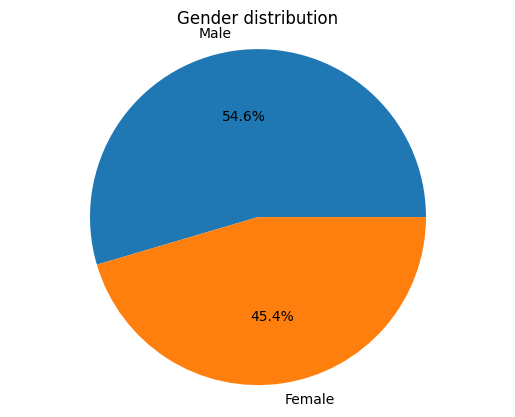

In [52]:
plt.pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index, autopct='%1.1f%%')
plt.title('Gender distribution')
plt.axis('equal')
plt.show()

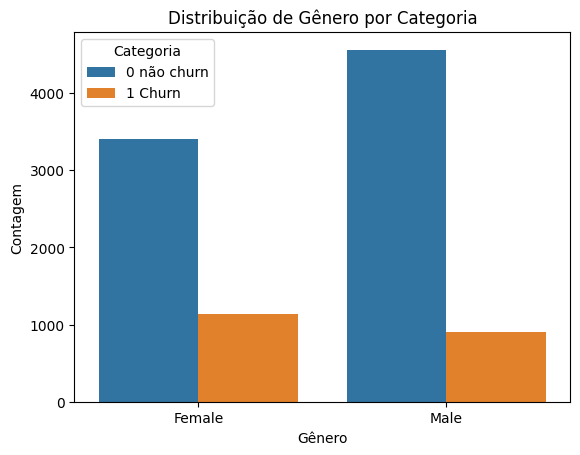

In [53]:
sns.countplot(x='Gender', hue='Exited', data=df)

# Personalizando o gráfico
plt.title('Distribuição de Gênero por Categoria')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Categoria', labels=['0 não churn', '1 Churn'])
plt.show()

Variável "Gender" possui proporções semelhantes entre as duas categorias (Masculino e Feminino). Será removida da modelagem para não ter o risco de obter discriminação do modelo

### Geography

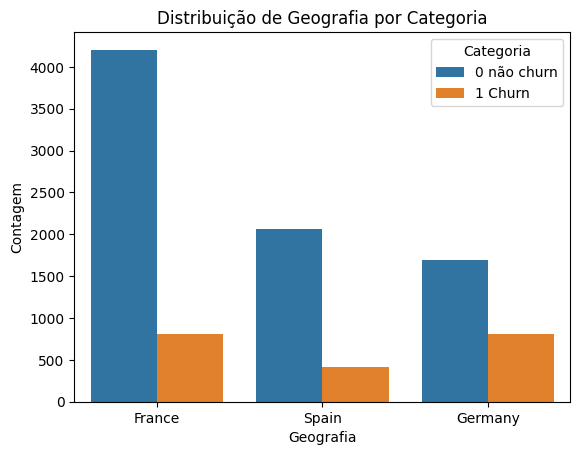

In [54]:
sns.countplot(x='Geography', hue='Exited', data=df)

# Personalizando o gráfico
plt.title('Distribuição de Geografia por Categoria')
plt.xlabel('Geografia')
plt.ylabel('Contagem')
plt.legend(title='Categoria', labels=['0 não churn', '1 Churn'])
plt.show()

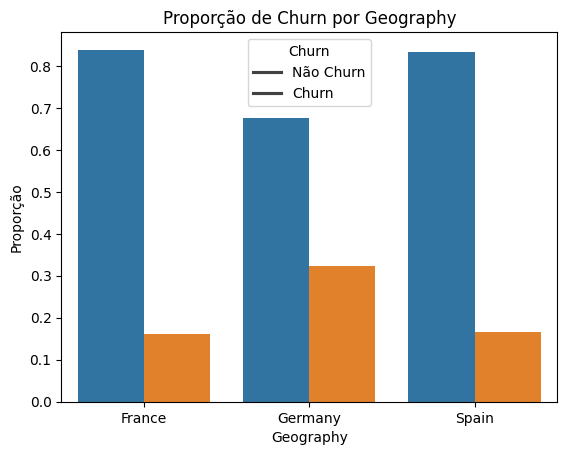

In [55]:
df_proporcao = df.groupby(['Geography', 'Exited']).size().div(df.groupby('Geography').size(), level=0)
df_proporcao = df_proporcao.reset_index(name='proporcao')

# Criando o gráfico de barras empilhadas normalizado
sns.barplot(x='Geography', y='proporcao', hue='Exited', data=df_proporcao)

# Personalizando o gráfico
plt.title('Proporção de Churn por Geography')
plt.xlabel('Geography')
plt.ylabel('Proporção')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()

In [56]:
df_proporcao.head(6)

,Geography,Exited,proporcao
0,France,0,0.838452
1,France,1,0.161548
2,Germany,0,0.675568
3,Germany,1,0.324432
4,Spain,0,0.833266
5,Spain,1,0.166734


A análise do churn dos países mostra que na Espanha e França em média 16% da população dos países contidos na base dão churn, enquanto a Alemanha é um pouco maior, com 32%

## Variáveis contínuas

### Age

In [57]:
media_idade_por_churn = df.groupby('Exited')['Age'].mean()

print(media_idade_por_churn)

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


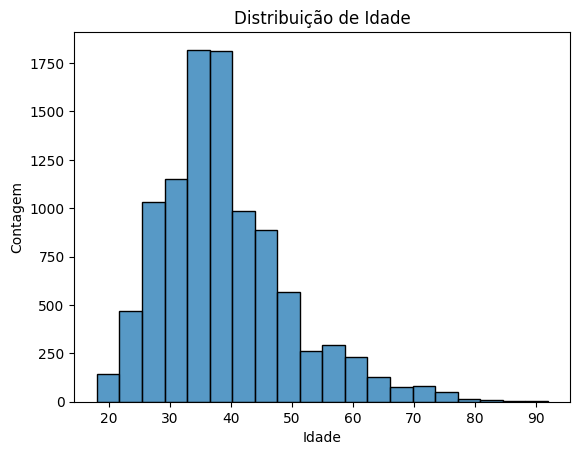

In [58]:
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

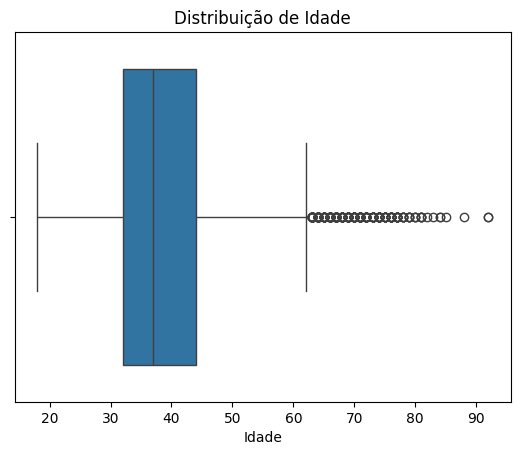

In [59]:
sns.boxplot(x='Age', data=df)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.show()

Na distribuição e análise de idade foram encontrados outliers e valores que não podem ser levados em consideração para as análises estatística. Porém, estes valores não serão removidos para garantir a qualidade do modelo para os dados futuros.

### CreditScore

In [91]:
media_CreditScore = df.groupby('Exited')['CreditScore'].mean()

print(media_CreditScore)

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64


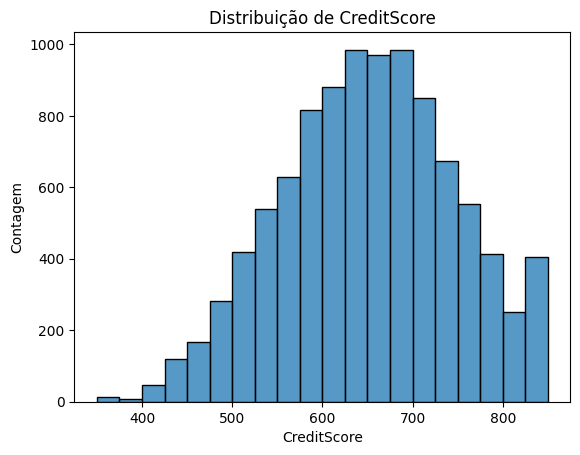

In [92]:
sns.histplot(data=df, x='CreditScore', bins=20)
plt.title('Distribuição de CreditScore')
plt.xlabel('CreditScore')
plt.ylabel('Contagem')
plt.show()


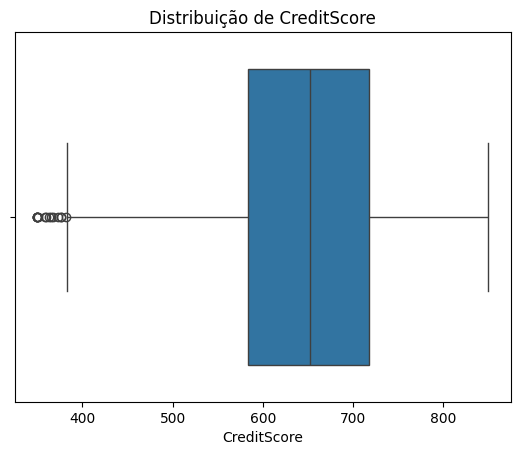

In [93]:
sns.boxplot(x='CreditScore', data=df)
plt.title('Distribuição de CreditScore')
plt.xlabel('CreditScore')
plt.show()

In [94]:
bins = [0, 300, 500, 700, 1000]
labels = [f"{bins[i]} a {bins[i+1]-1}" for i in range(len(bins)-1)]

# Aplicando pd.cut() com os rótulos personalizados
df['Faixa_Score'] = pd.cut(df['CreditScore'], bins=bins, labels=labels)

In [95]:
df['Faixa_Score'].value_counts()

Faixa_Score
500 a 699    6241
700 a 999    3116
300 a 499     643
0 a 299         0
Name: count, dtype: int64

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\1105297195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)
C:\Users\julio\AppData\Local\Temp\ipykernel_5500\1105297195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)


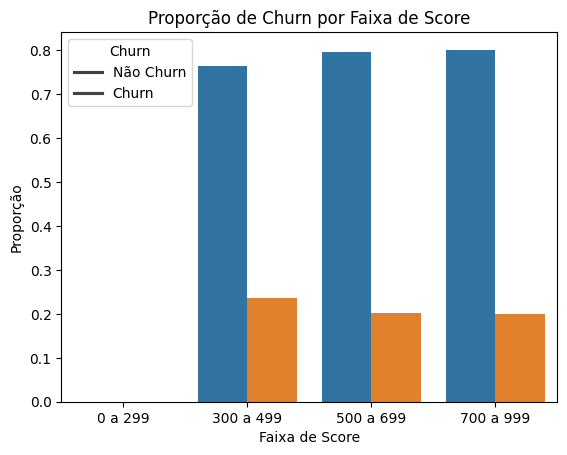

In [96]:
df_proporcao = df.groupby(['Faixa_Score', 'Exited']).size().div(df.groupby('Faixa_Score').size(), level=0)
df_proporcao = df_proporcao.reset_index(name='proporcao')


sns.barplot(x='Faixa_Score', y='proporcao', hue='Exited', data=df_proporcao)

plt.title('Proporção de Churn por Faixa de Score')
plt.xlabel('Faixa de Score')
plt.ylabel('Proporção')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()

<Axes: xlabel='Faixa_Score', ylabel='proporcao'>

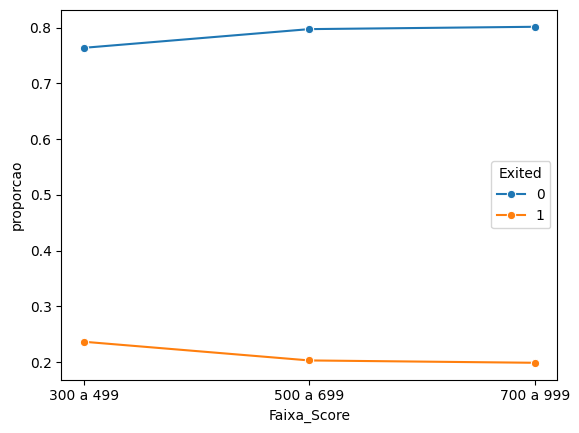

In [97]:
sns.lineplot(x='Faixa_Score', y='proporcao', hue='Exited', data=df_proporcao, marker='o')


In [98]:
df_proporcao.head(10)

,Faixa_Score,Exited,proporcao
0,0 a 299,0,NaN
1,0 a 299,1,NaN
2,300 a 499,0,0.763608
3,300 a 499,1,0.236392
4,500 a 699,0,0.797148
5,500 a 699,1,0.202852
6,700 a 999,0,0.801348
7,700 a 999,1,0.198652


Em geral, a faixa de score de 300 a 499 é a que possui proporcionalmente a maior taxa de churn, com 24%. Mas ainda assim, essa variável se mostrou não ter relevância o suficiente na decisão de churn.

### Tenure

In [87]:
media_tenure_por_churn = df.groupby('Exited')['Tenure'].mean()

print(media_tenure_por_churn)

Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64


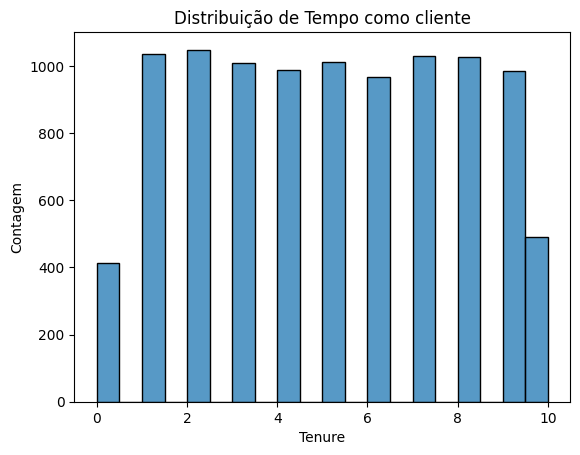

In [88]:
sns.histplot(data=df, x='Tenure', bins=20)
plt.title('Distribuição de Tempo como cliente')
plt.xlabel('Tenure')
plt.ylabel('Contagem')
plt.show()

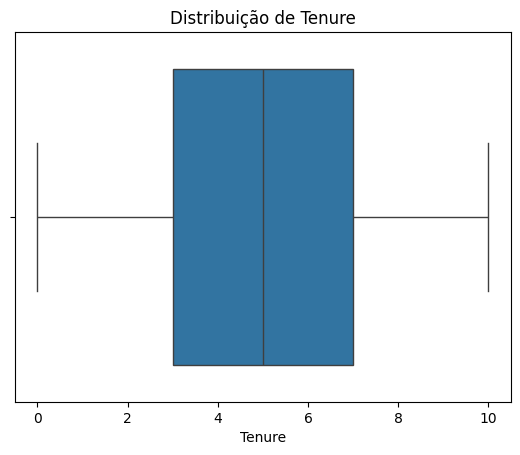

In [89]:
sns.boxplot(x='Tenure', data=df)
plt.title('Distribuição de Tenure')
plt.xlabel('Tenure')
plt.show()

In [90]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [101]:
bins = [0, 3, 5, 8, 10]
labels = [f"{bins[i]} a {bins[i+1]-1}" for i in range(len(bins)-1)]


df['Faixa_Tenure'] = pd.cut(df['Tenure'], bins=bins, labels=labels)

In [102]:
df['Faixa_Tenure'].value_counts()

Faixa_Tenure
0 a 2    3092
5 a 7    3020
3 a 4    2001
8 a 9    1474
Name: count, dtype: int64

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\2386785045.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Tenure', 'Exited']).size().div(df.groupby('Faixa_Tenure').size(), level=0)
C:\Users\julio\AppData\Local\Temp\ipykernel_5500\2386785045.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcao = df.groupby(['Faixa_Tenure', 'Exited']).size().div(df.groupby('Faixa_Tenure').size(), level=0)


<Axes: xlabel='Faixa_Tenure', ylabel='proporcao'>

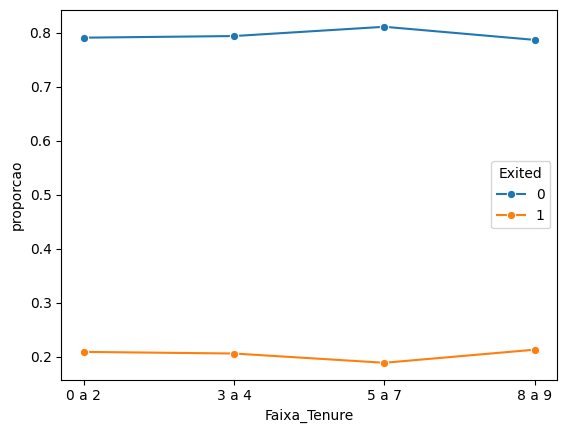

In [103]:
df_proporcao = df.groupby(['Faixa_Tenure', 'Exited']).size().div(df.groupby('Faixa_Tenure').size(), level=0)
df_proporcao = df_proporcao.reset_index(name='proporcao')

sns.lineplot(x='Faixa_Tenure', y='proporcao', hue='Exited', data=df_proporcao, marker='o')

### Balance

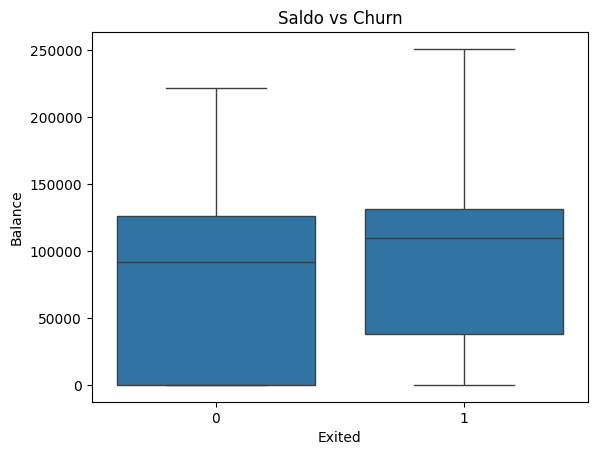

In [104]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Saldo vs Churn')
plt.show()

In [105]:
media_balance_por_churn = df.groupby('Exited')['Balance'].mean()

print(media_balance_por_churn)

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64


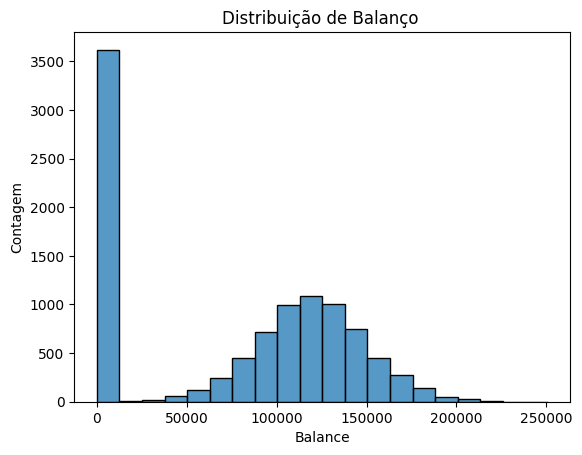

In [106]:
sns.histplot(data=df, x='Balance', bins=20)
plt.title('Distribuição de Balanço ')
plt.xlabel('Balance')
plt.ylabel('Contagem')
plt.show()

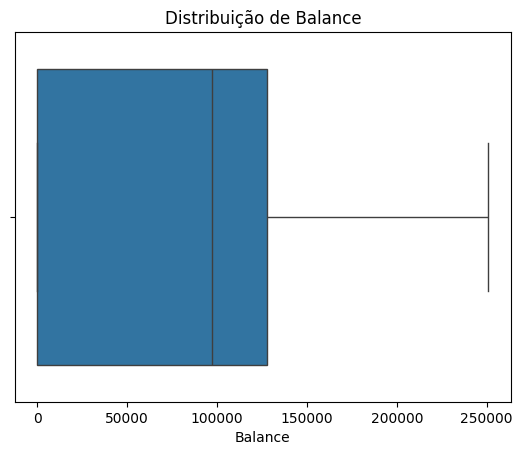

In [107]:
sns.boxplot(x='Balance', data=df)
plt.title('Distribuição de Balance')
plt.xlabel('Balance')
plt.show()

In [110]:
df['Balance'].describe()


count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [112]:
df_balance = df[df['Balance']== 0]

In [113]:
df_balance['Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

Foi notado mais de 30% dos registros possuem Balance = 0. Desses, somente 14% possuem Churn. 

In [114]:
balance_zero = df[df['Balance'] == 0]
balance_non_zero = df[df['Balance'] > 0]

# Taxa de churn para cada grupo
churn_zero = balance_zero['Exited'].mean()
churn_non_zero = balance_non_zero['Exited'].mean()

print(f"Taxa de churn para Balance = 0: {churn_zero:.2%}")
print(f"Taxa de churn para Balance > 0: {churn_non_zero:.2%}")

Taxa de churn para Balance = 0: 13.82%
Taxa de churn para Balance > 0: 24.08%


In [133]:
balance_non_zero['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\2819352228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Churn Rate', data=comparison_df, palette='viridis')


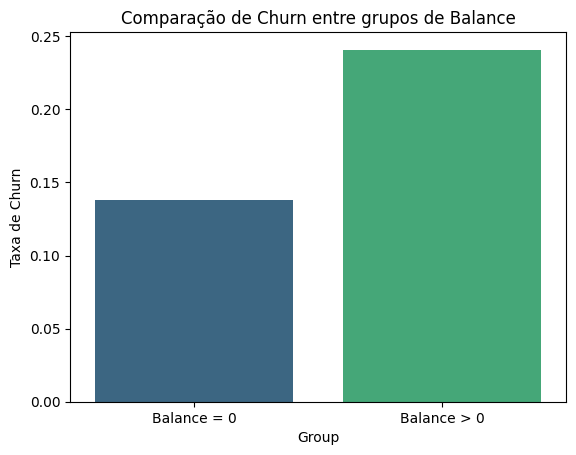

In [115]:
comparison = {
    'Group': ['Balance = 0', 'Balance > 0'],
    'Churn Rate': [churn_zero, churn_non_zero]
}
comparison_df = pd.DataFrame(comparison)


sns.barplot(x='Group', y='Churn Rate', data=comparison_df, palette='viridis')
plt.title('Comparação de Churn entre grupos de Balance')
plt.ylabel('Taxa de Churn')
plt.show()

In [119]:
churn_zero = balance_zero['Exited'].sum()
churn_non_zero = balance_non_zero['Exited'].sum()


total_churn = df['Exited'].sum()


prop_zero = churn_zero / total_churn
prop_non_zero = churn_non_zero / total_churn


print(f"{prop_zero:.2%} do churn total pertence a clientes com Balance = 0")
print(f"{prop_non_zero:.2%} do churn total pertence a clientes com Balance > 0")

24.55% do churn total pertence a clientes com Balance = 0
75.45% do churn total pertence a clientes com Balance > 0


In [124]:
balance_zero = df[df['Balance'] == 0]
balance_non_zero = df[df['Balance'] > 0]


bins = pd.qcut(balance_non_zero['Balance'], q=4)


balance_non_zero['Balance_bins'] = bins.apply(lambda x: f"{int(x.left)} a {int(x.right)}")


balance_zero['Balance_bins'] = '0 a 0' 
df = pd.concat([balance_zero, balance_non_zero])

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\3194176985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_non_zero['Balance_bins'] = bins.apply(lambda x: f"{int(x.left)} a {int(x.right)}")
C:\Users\julio\AppData\Local\Temp\ipykernel_5500\3194176985.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_zero['Balance_bins'] = '0 a 0'  # Rótulo para Balance = 0


In [ ]:
churn_by_balance_bin = df.groupby('Balance_bins')['Exited'].sum()


total_churn = df['Exited'].sum()
churn_by_balance_bin_prop = (churn_by_balance_bin / total_churn) * 100


print(churn_by_balance_bin_prop)

Balance_bins
0 a 0              24.545901
100181 a 119839    21.453117
119839 a 139512    19.833088
139512 a 250898    18.016691
3768 a 100181      16.151203
Name: Exited, dtype: float64


In [129]:
churn_distribution = churn_by_balance_bin_prop.reset_index()
churn_distribution.columns = ['Faixa de Balance', 'Percentual de Churn']

In [130]:

churn_distribution['Lower_Bound'] = churn_distribution['Faixa de Balance'].apply(
    lambda x: 0 if x == '0 a 0' else int(x.split(' a ')[0])
)


churn_distribution = churn_distribution.sort_values(by='Lower_Bound').drop(columns=['Lower_Bound'])

C:\Users\julio\AppData\Local\Temp\ipykernel_5500\377600234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faixa de Balance', y='Percentual de Churn', data=churn_distribution, palette='viridis')


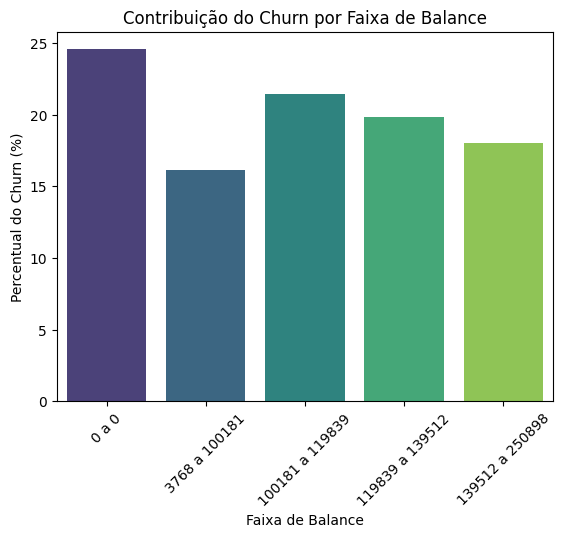

In [ ]:
sns.barplot(x='Faixa de Balance', y='Percentual de Churn', data=churn_distribution, palette='viridis')
plt.xticks(rotation=45)  
plt.title('Contribuição do Churn por Faixa de Balance')
plt.ylabel('Percentual do Churn (%)')
plt.xlabel('Faixa de Balance')
plt.show()

In [135]:
churn_distribution

,Faixa de Balance,Percentual de Churn
0,0 a 0,24.545901
4,3768 a 100181,16.151203
1,100181 a 119839,21.453117
2,119839 a 139512,19.833088
3,139512 a 250898,18.016691


Analisando por faixas, vimos que de modo geral, o churn de quem tem balance = 0 é o mais alto, mas de maneira equilibrada referente as outras faixas de balance.

### NumOfProducts

In [136]:
media_products_por_churn = df.groupby('Exited')['NumOfProducts'].mean()

print(media_products_por_churn)

Exited
0    1.544267
1    1.475209
Name: NumOfProducts, dtype: float64


In [137]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

In [138]:
df['NumOfProducts'] = df['NumOfProducts'].astype(int)

In [145]:
df['NumOfProducts'].value_counts(normalize=True)
#df['NumOfProducts'].value_counts()

NumOfProducts
1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: proportion, dtype: float64

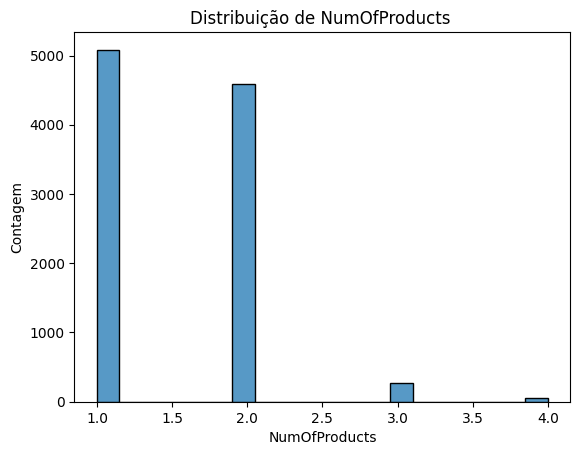

In [140]:
sns.histplot(data=df, x='NumOfProducts', bins=20)
plt.title('Distribuição de NumOfProducts ')
plt.xlabel('NumOfProducts')
plt.ylabel('Contagem')
plt.show()

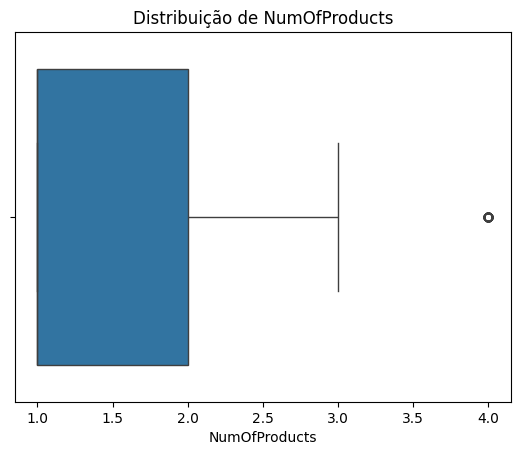

In [141]:
sns.boxplot(x='NumOfProducts', data=df)
plt.title('Distribuição de NumOfProducts')
plt.xlabel('NumOfProducts')
plt.show()

Foi constatado o valor "4" da variável NumOfProducts como Outlier, tendo em vista que só há 0.6% dos registros para este valor. Ainda assim não será removido pois na base de teste (desconhecido) poderá ocorrer este valor

In [143]:
df.groupby(df["NumOfProducts"])['Exited'].sum()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

foi constatado que 100% do valor 4 possui churn positivo, o que pode influenciar o modelo a sempre pesar para o churn positivo quando cair este valor nos dados novos. Essa variável será observada na escolha no modelo.

### HasCrCard

In [146]:
df['HasCrCard'].value_counts(normalize=True)

HasCrCard
1    0.7055
0    0.2945
Name: proportion, dtype: float64

In [147]:
credit_card_churn = df.groupby(['HasCrCard', 'Exited']).size().reset_index(name='Count')

print(credit_card_churn)

   HasCrCard  Exited  Count
0          0       0   2332
1          0       1    613
2          1       0   5631
3          1       1   1424


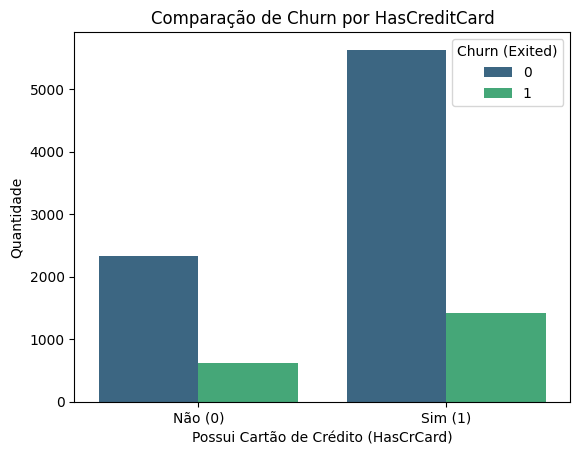

In [148]:
sns.barplot(
    data=credit_card_churn,
    x='HasCrCard',
    y='Count',
    hue='Exited',
    palette='viridis'
)


plt.title('Comparação de Churn por HasCreditCard')
plt.xlabel('Possui Cartão de Crédito (HasCrCard)')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não (0)', 'Sim (1)'])  
plt.legend(title='Churn (Exited)', loc='upper right')
plt.show()

In [149]:
total_by_credit_card = df.groupby('HasCrCard')['Exited'].count()


churn_by_credit_card = df[df['Exited'] == 1].groupby('HasCrCard')['Exited'].count()


churn_proportion = (churn_by_credit_card / total_by_credit_card) * 100


churn_proportion = churn_proportion.reset_index()
churn_proportion.columns = ['HasCrCard', 'ChurnPercentage']


print(churn_proportion)

   HasCrCard  ChurnPercentage
0          0        20.814941
1          1        20.184266


A proporção da base de quem tem cartão de crédito é de 70%, porém de cada um dos valores, a proporção de churn são semelhantes entre eles.

### IsActiveMember

In [150]:
df['IsActiveMember'].value_counts(normalize=True)

IsActiveMember
1    0.5151
0    0.4849
Name: proportion, dtype: float64

In [151]:
is_active_churn = df.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')

print(is_active_churn)

   IsActiveMember  Exited  Count
0               0       0   3547
1               0       1   1302
2               1       0   4416
3               1       1    735


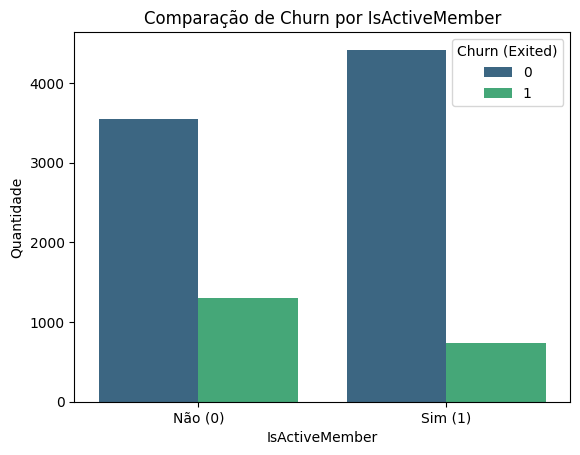

In [152]:
sns.barplot(
    data=is_active_churn,
    x='IsActiveMember',
    y='Count',
    hue='Exited',
    palette='viridis'
)


plt.title('Comparação de Churn por IsActiveMember')
plt.xlabel('IsActiveMember')
plt.ylabel('Quantidade')
plt.xticks([0, 1], ['Não (0)', 'Sim (1)'])  
plt.legend(title='Churn (Exited)', loc='upper right')
plt.show()

In [153]:
total_by_active_member = df.groupby('IsActiveMember')['Exited'].count()


churn_by_active_member = df[df['Exited'] == 1].groupby('IsActiveMember')['Exited'].count()


churn_proportion = (churn_by_active_member / total_by_active_member) * 100


churn_proportion = churn_proportion.reset_index()
churn_proportion.columns = ['IsActiveMember', 'ChurnPercentage']


print(churn_proportion)

   IsActiveMember  ChurnPercentage
0               0        26.850897
1               1        14.269074


Para a variável de Membros ativos, a porcentagem de churn para cada uma das classes também está equilibrada, o que irá ajudar o modelo com os dados novos

### EstimatedSalary

In [154]:
media_salary_por_churn = df.groupby('Exited')['EstimatedSalary'].mean()

print(media_salary_por_churn)

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


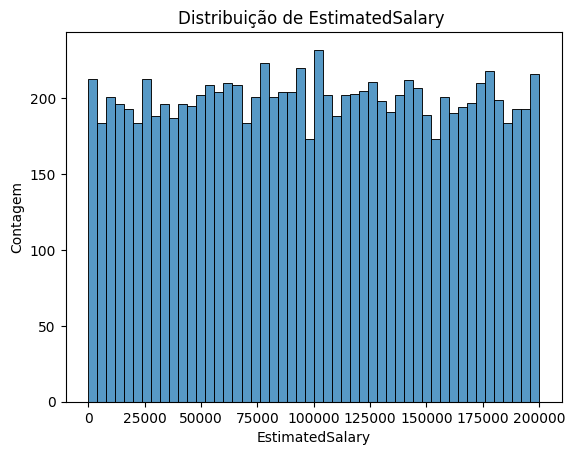

In [157]:
sns.histplot(data=df, x='EstimatedSalary', bins=50)
plt.title('Distribuição de EstimatedSalary ')
plt.xlabel('EstimatedSalary')
plt.ylabel('Contagem')
plt.show()

In [158]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

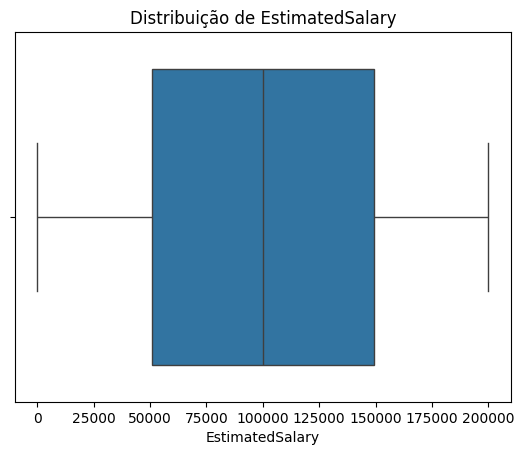

In [159]:
sns.boxplot(x='EstimatedSalary', data=df)
plt.title('Distribuição de EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.show()

In [163]:
df['faixa_salario'] = pd.qcut(df['EstimatedSalary'], q=4)




In [164]:
df['faixa_salario'].value_counts()

faixa_salario
(11.579, 51002.11]          2500
(51002.11, 100193.915]      2500
(100193.915, 149388.248]    2500
(149388.248, 199992.48]     2500
Name: count, dtype: int64

In [165]:
churn_by_faixa_salario = df.groupby('faixa_salario')['Exited'].sum()


total_churn = df['Exited'].sum()
churn_by_faixa_salario_prop = (churn_by_faixa_salario / total_churn) * 100


print(churn_by_faixa_salario_prop)

faixa_salario
(11.579, 51002.11]          24.545901
(51002.11, 100193.915]      24.300442
(100193.915, 149388.248]    24.693176
(149388.248, 199992.48]     26.460481
Name: Exited, dtype: float64


C:\Users\julio\AppData\Local\Temp\ipykernel_5500\2461614626.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_faixa_salario = df.groupby('faixa_salario')['Exited'].sum()


A faixa salarial também possui equilibrio entre todas as faixas quando se fala sobre Churn positivo. A distribuição é normal e não há outliers.

### Análise de correlação

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  Faixa_Score      10000 non-null  category
 12  Faixa_Tenure     9587 non-null   category
 13  Balance_bins     10000 non-null  object  
 14  faixa_salario    10000 non-null  category
dtypes: category(3), float64(2), int64(7), object(3)
memory usage: 1.0+ MB


In [178]:
variaveis_continuas = ['CreditScore','Tenure','Balance', 'NumOfProducts','EstimatedSalary', 'Exited']

df_continuas = df[variaveis_continuas]

<Axes: >

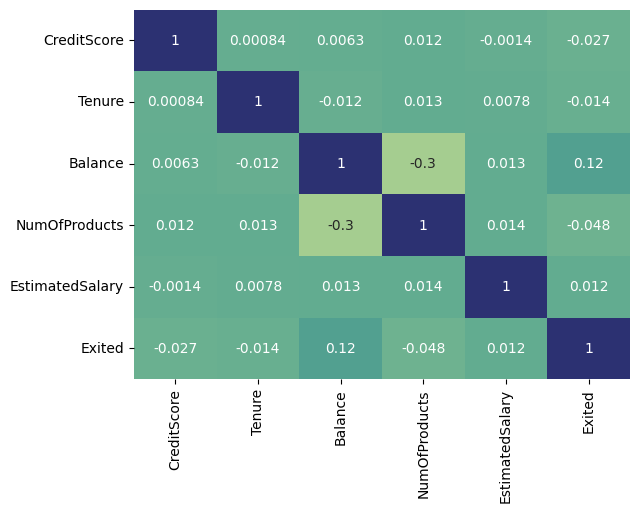

In [190]:
sns.heatmap(df_continuas.corr(), cmap='crest', cbar=False, annot=True)

In [180]:
pearson_corr = df_continuas.corr(method='pearson')['Exited'].sort_values(ascending=False)

In [181]:
print("Correlação de Pearson:")
print(pearson_corr)

Correlação de Pearson:
Exited             1.000000
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64


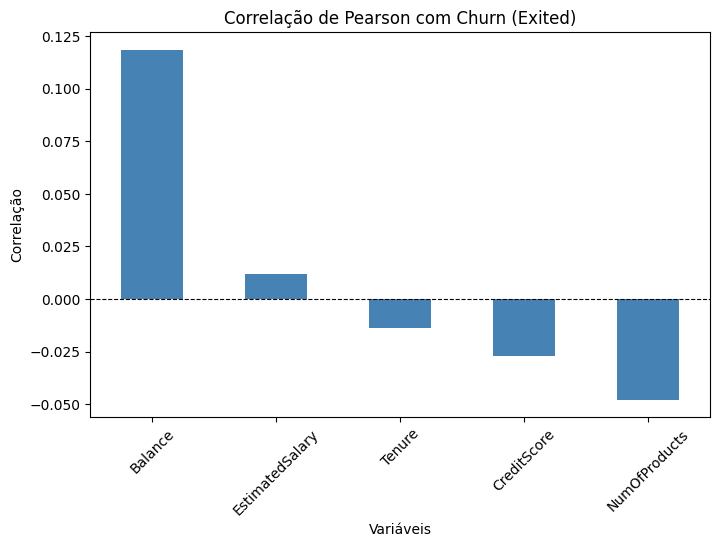

In [182]:
pearson_corr.drop('Exited').plot(kind='bar', color='steelblue', figsize=(8, 5))
plt.title('Correlação de Pearson com Churn (Exited)')
plt.ylabel('Correlação')
plt.xlabel('Variáveis')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()

Foi constatado que não há nenhuma variável que possua forte correlação com a variável Exited, tanto negativa quanto positiva.